In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# train_test_split

takes a list of arrays and splits each array into two arrays by randomly selecting rows or values

In [4]:
X = np.arange(12).reshape((2, 6)).T
y = np.arange(6)
z = np.array([0,0,0,1,1,1])
print(X)
print(y)
print(z)

[[ 0  6]
 [ 1  7]
 [ 2  8]
 [ 3  9]
 [ 4 10]
 [ 5 11]]
[0 1 2 3 4 5]
[0 0 0 1 1 1]


In [5]:
X_train, X_test = train_test_split(X, test_size = 1/3, random_state = 1)
print(X_train)
print(X_test)

[[ 4 10]
 [ 0  6]
 [ 3  9]
 [ 5 11]]
[[2 8]
 [1 7]]


In [8]:
y_train, y_test = train_test_split(y, test_size = 1/3, random_state = 1)
print(y_train)
print(y_test)

[4 0 3 5]
[2 1]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 4 10]
 [ 0  6]
 [ 3  9]
 [ 5 11]]
[[2 8]
 [1 7]]
[4 0 3 5]
[2 1]


In [17]:
## if you have a categorical variable, the stratify argument ensures
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 1/3, random_state = 2, stratify = z)
print(X_train)
print(X_test)
print(z_train)
print(z_test)

[[ 2  8]
 [ 1  7]
 [ 3  9]
 [ 5 11]]
[[ 4 10]
 [ 0  6]]
[0 0 1 1]
[1 0]


# iris data

In [19]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [22]:
print(iris.data[:5,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [25]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size = 0.2, random_state = 1, stratify = iris.target)

In [24]:
print(np.bincount(y_test))

[10 10 10]


# we will fit a k nearest neighbors classifier

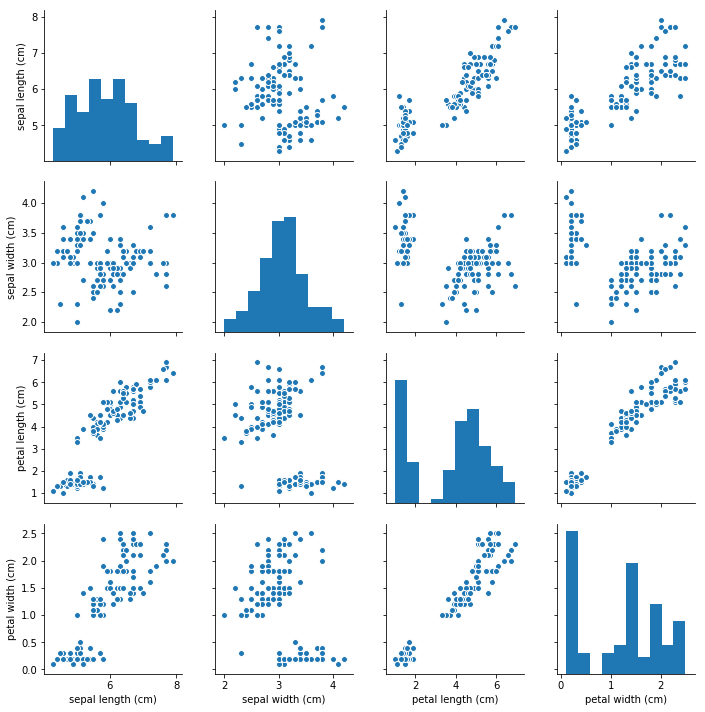

In [32]:
import seaborn as sns
dat = pd.DataFrame(X_train)
dat.columns = iris.feature_names
sns.pairplot(dat)

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
print(knn.predict(X_test))

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


In [38]:
print(y_test)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [43]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]], dtype=int64)

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}  # we make a dictionary called param_grid
# and the keyword will be the argument that goes into the model

knn = KNeighborsClassifier()  # note we do not specify n_neighbors here
knn_cv = GridSearchCV(knn, param_grid, cv = 5)  # we call GridSearchCV, we pass it the name of our model 'knn', and 
# also we give it the parameters it will search through
# cv=5 means we score it based on 5-fold cross validation

# we are not using the test data at all
# we are only using the training data

In [46]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
knn_cv.best_params_

{'n_neighbors': 13}

In [49]:
knn_cv.best_score_

0.9833333333333333

In [52]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print(confusion_matrix(y_train, knn.predict(X_train)))

[[40  0  0]
 [ 0 38  2]
 [ 0  0 40]]


In [53]:
118/120

0.9833333333333333

In [54]:
print(confusion_matrix(y_test, knn.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [60]:
knn = KNeighborsClassifier(n_neighbors=13)
cv_scores = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv_scores)
print(np.mean(cv_scores))

[0.95833333 1.         1.         1.         0.95833333]
0.9833333333333334


In [61]:
23/24

0.9583333333333334

In [59]:
knn = KNeighborsClassifier(n_neighbors=2)
cv_scores = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv_scores)
print(np.mean(cv_scores))

[0.91666667 0.95833333 0.875      1.         1.        ]
0.95
